The values of weights without regularisation are
w 0 = 4.000000000000018
w 1 = -29.82200920757027
w 2 = 199.99999999999994
w 3 = 1999.7211031440343


The values of weights with regularisation are
w 0 = 4.0000366796072475
w 1 = -29.997364505582404
w 2 = 199.9998904620566
w 3 = 1999.9956612520796


The mean squared error for training data without regularisationis: 0.001858678840633059


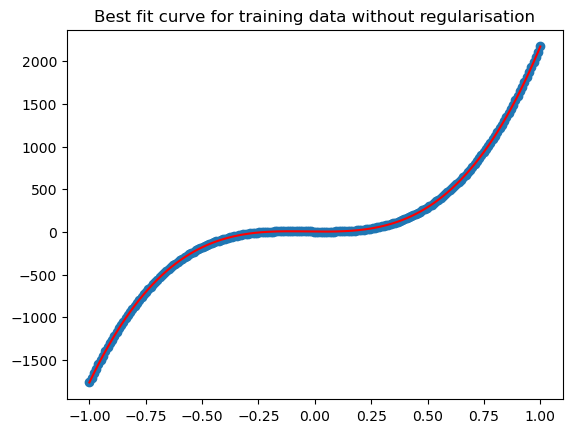

The mean squared error for test data without regularisation is: 2.6078896165096657


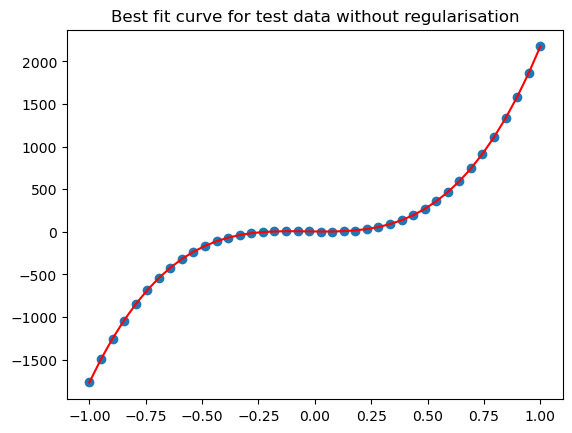

The mean squared error of training data with regularisation for training data is: 0.2020445665170956


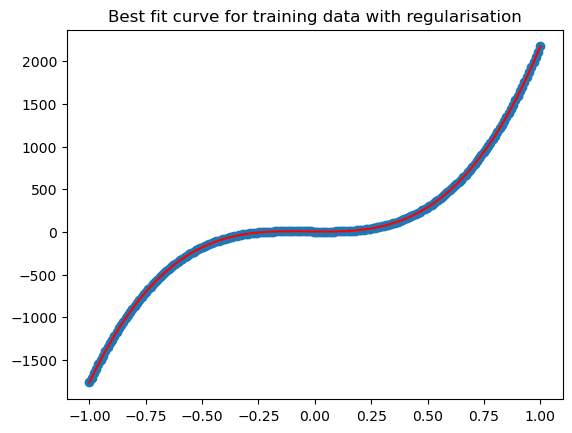

The mean squared error of test data with regularisation for test data is: 3.5840385807326895


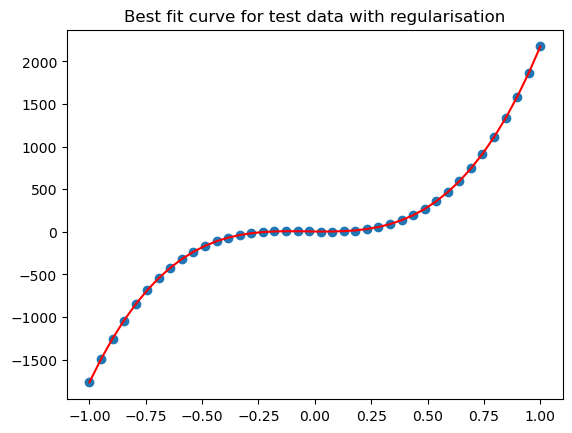

In [228]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

df1=pd.read_csv('Train_dataset.csv')
df2=pd.read_csv('Test_dataset.csv')

input_train0=(df1['x']/max(df1['x'])).tolist()
output_train=df1['y'].tolist()

# print(output_train)

input_train1=np.array(df1['x'])


input_train2=np.power(input_train1,2)/max(np.power(input_train1,2))
input_train3=np.power(input_train1,3)/max(np.power(input_train1,3))

input_train=[input_train0]
input_train.append((input_train2).tolist())
input_train.append(input_train3.tolist())

# print(input_train)



input_test0=(df2['x']/max(df2['x'])).tolist()
output_test=df2['y'].tolist()

# print(output_test)

input_test1=np.array(df2['x'])


input_test2=np.power(input_test1,2)/max(np.power(input_test1,2))
input_test3=np.power(input_test1,3)/max(np.power(input_test1,3))

input_test=[input_test0]
input_test.append((input_test2).tolist())
input_test.append(input_test3.tolist())

# print(input_test)



def W(*arg):
    wlist=[*arg]
    # print(wlist)
    hlist=[wlist[i+1]*np.array(input_train[i]) for i in range(len(input_train))]
   
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)

    return sumlist



def W_test(*arg):
    wlist=[*arg]
    # print(wlist)
    hlist=[wlist[i+1]*np.array(input_test[i]) for i in range(len(input_test))]
   
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)

    return sumlist



def J(*arg):
    wlist=[*arg]
    hlist=[wlist[i+1]*np.array(input_train[i]) for i in range(len(input_train))] 
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
    # print(sumlist)

    Jlist=[(sumlist[i]-output_train[i])**2 for i in range(len(output_train))]
    return sum(Jlist)/(2*len(Jlist))


def J_test(*arg):
    wlist=[*arg]
    hlist=[wlist[i+1]*np.array(input_test[i]) for i in range(len(input_test))] 
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
    # print(sumlist)

    Jlist=[(sumlist[i]-output_test[i])**2 for i in range(len(output_test))]
    return sum(Jlist)/(2*len(Jlist))


def Jreg(*arg):

    lambd=0.00001
    wlist=[*arg]
    
    hlist=[wlist[i+1]*np.array(input_train[i]) for i in range(len(input_train))] 
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
    # print(sumlist)

    Jlist=[(sumlist[i]-output_train[i])**2 for i in range(len(output_train))]

    w_reg=[wlist[i]**2 for i in range(1,len(wlist))]

    sum_reg=sum(Jlist)+sum(w_reg)*lambd

    return sum_reg/(2*len(Jlist))



def Jreg_test(*arg):

    lambd=0.00001
    wlist=[*arg]
    
    hlist=[wlist[i+1]*np.array(input_test[i]) for i in range(len(input_test))] 
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)
    # print(sumlist)

    Jlist=[(sumlist[i]-output_test[i])**2 for i in range(len(output_test))]

    w_reg=[wlist[i]**2 for i in range(1,len(wlist))]

    sum_reg=sum(Jlist)+sum(w_reg)*lambd

    return sum_reg/(2*len(Jlist))



def dir(*arg):
    wlist=[*arg]
    # print(wlist)
    hlist=[wlist[i+1]*np.array(input_train[i]) for i in range(len(input_train))]
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)

    dir=[]
    dirlist=[(sumlist[i]-output_train[i]) for i in range(len(output_train))]
    dir1=sum(dirlist)/len(dirlist)
    dir.append(dir1)
    # print(dir)
    for j in input_train:
        dirlist=[(sumlist[i]-output_train[i])*j[i] for i in range(len(output_train))]
        # print(dirlist)
        dir1=sum(dirlist)/len(dirlist)
        dir.append(dir1)
    # print(dir)

    return np.array(dir)

def dir_reg(*arg):
    lambd=1e-4
    wlist=[*arg]
    # print(wlist)
    hlist=[wlist[i+1]*np.array(input_train[i]) for i in range(len(input_train))]
    sumlist=wlist[0]
    for i in hlist:
        sumlist=sumlist+np.array(i)

    dir=[]
    dirlist=[(sumlist[i]-output_train[i]) for i in range(len(output_train))]
    dir1=sum(dirlist)/len(dirlist)
    dir.append(dir1)
    # print(dir)
    for j in input_train:
        dirlist=[(sumlist[i]-output_train[i])*j[i] for i in range(len(output_train))]

        # print(dirlist)
        dir1=sum(dirlist)/len(dirlist)
        # print(wlist[input_train.index(j)+1])
        dir1_reg= dir1+lambd*wlist[input_train.index(j)+1]
        dir1_reg=dir1_reg+dir1
        dir.append(dir1_reg)
    # print(dir)

    return np.array(dir)
   
def SGD(w1,e,M):
    k=1
    a=1
    while np.linalg.norm(dir(w1[0],w1[1],w1[2],w1[3]))>e and k<M :
        w1=w1-a*dir(w1[0],w1[1],w1[2],w1[3])
        k=k+1
    
    print('The values of weights without regularisation are')

    for i in range(len(w1)):
        print ('w',i,'=',w1[i])
    return w1


def SGD_reg(w1,e,M):
    lambd=0.00001
    k=1
    a=1
    while np.linalg.norm(dir_reg(w1[0],w1[1],w1[2],w1[3]))>e and k<M :
        w1=w1*(1-a*(lambd/len(output_train))) -a*dir(w1[0],w1[1],w1[2],w1[3])
        k=k+1  
    print('\n')
    print('The values of weights with regularisation are')
    for i in range(len(w1)):
        print ('w',i,'=',w1[i])
    return w1




w=np.array([0,0,0,0])
min_sgd = SGD(w1=w,M=500,e=1e-7)
min_reg=SGD_reg(w1=w,M=1000,e=1e-7)

print('\n')


mse=2*J(min_sgd[0],min_sgd[1],min_sgd[2],min_sgd[3])
print('The mean squared error for training data without regularisationis:',mse)

fig=plt.figure()
plt.scatter(input_train0,output_train)
output_test_pred= W(min_sgd[0],min_sgd[1],min_sgd[2],min_sgd[3])
plt.plot(input_train0,output_test_pred,'r')
plt.title('Best fit curve for training data without regularisation')
plt.show()


mse_test=2*J_test(min_sgd[0],min_sgd[1],min_sgd[2],min_sgd[3])
print('The mean squared error for test data without regularisation is:',mse_test)

fig=plt.figure()
plt.scatter(input_test0,output_test)
output_test_pred= W_test(min_sgd[0],min_sgd[1],min_sgd[2],min_sgd[3])
plt.plot(input_test0,output_test_pred,'r')
plt.title('Best fit curve for test data without regularisation')
plt.show()


mse_reg=2*Jreg(min_reg[0],min_reg[1],min_reg[2],min_reg[3])
print('The mean squared error of training data with regularisation for training data is:',mse_reg)


fig=plt.figure()
plt.scatter(input_train0,output_train)
output_train_pred= W(min_reg[0],min_reg[1],min_reg[2],min_reg[3])
plt.plot(input_train0,output_train_pred,'r')
plt.title('Best fit curve for training data with regularisation')
plt.show()



mse_reg_test=2*Jreg_test(min_reg[0],min_reg[1],min_reg[2],min_reg[3])
print('The mean squared error of test data with regularisation for test data is:',mse_reg_test)

fig=plt.figure()
plt.scatter(input_test0,output_test)
output_test_pred= W_test(min_reg[0],min_reg[1],min_reg[2],min_reg[3])
plt.plot(input_test0,output_test_pred,'r')
plt.title('Best fit curve for test data with regularisation')
plt.show()









